## An example of how to view DSMACC results

Firstly start by importing the provided library from the main DSMACC directory. 

In [1]:
%matplotlib inline 
# above only needed for Jupyter notebooks 

import dsmacc

loading libraries
ready


#### For each NetCDF file, we can select a run and create an object that contains its data

The `sim_data` class may be given arguments for a filename or groupid (index number of the required group should we not require interactive selection. 

In [2]:
example_file = dsmacc.sim_data()

Select file to open: 

0  -  methane_1707051607.nc
1  -  methane_1707051609.nc
Enter Number 
1
methane took 58 seconds to compute.


#### Should we forget our selection we are able to draw this information out again

In [3]:
print 'Filename selected: %s'%example_file.filename
print 'Date: %s'%example_file.date
print 'Group: %s'%example_file.group
print example_file.description

Filename selected: methane_1707051609.nc
Date: Completion time:Wednesday 05 July 2017 at 16:09
Group: methane
Description: Optional,Do not write time more than once. ,,


#### Our species and rates are saved as a pandas dataframe

In [4]:
print 'Species:\n %s\n'%example_file.specs['CH4'].head()
print 'Rates:\n %s'%example_file.rates['CL+CH4-->CH3O2'].head()

Species:
 TIME
1970-06-23 00:10:00    2.000000e-08
1970-06-23 00:20:00    2.000000e-08
1970-06-23 00:30:00    2.000000e-08
1970-06-23 00:40:00    2.000000e-08
1970-06-23 00:50:00    2.000000e-08
Name: CH4, dtype: float64

Rates:
 TIME
1970-06-23 00:10:00    1.028993e-13
1970-06-23 00:20:00    1.028993e-13
1970-06-23 00:30:00    1.028993e-13
1970-06-23 00:40:00    1.028993e-13
1970-06-23 00:50:00    1.028993e-13
Name: CL+CH4-->CH3O2, dtype: float64


#### Species names and rates can be extracted from the pandas dataframes or using `.snames` and `.rnames`
Since these only contain reactions or concentrations > 0, 
we can also look at those with `.noconc` and `.norate`

In [5]:
#view the first 4 of each group
print '\n spec columns: '+ ' '.join(example_file.snames[:4])
print '\n rate columns: '+ ' '.join(example_file.rnames[:4])
print '\n ommited specs: '+ ' '.join(example_file.noconc[:4])
print '\n ommited rates: '+ ' '.join(example_file.norate[:4])


 spec columns: RO2 NA CO2 O1D

 rate columns: CL+CH4-->CH3O2 CH4+OH-->CH3O2 CH3O2+HO2-->CH3OOH CH3O2+HO2-->HCHO

 ommited specs: HSO3 SO3 SA CL

 ommited rates: EMISS-->EMISS CH3O2+NO-->CH3NO3 CH3O2+NO3-->CH3O+NO2 HCHO+NO3-->CO+HNO3+HO2


#### For quick plotting we can use the `.plot` function with one or more species. 
This has an optional `what` argument that may be either specs or rates

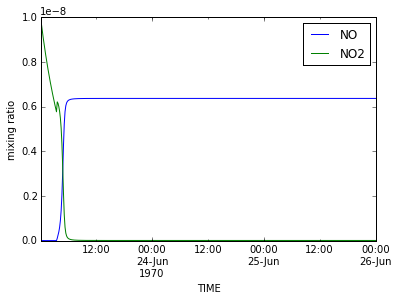

In [6]:
example_file.plot(['NO','NO2'],what='specs')


#### For full diagnostics we can use `.pdfdiagnostics`.
This has a `what` argument that may be either specs or rates, and a `n_subplot` argument which corresponds to the number of subplots per page of the pdf

In [7]:
example_file.pdfdiagnostics(what='specs',n_subplot = 5)


creating a diagnostic pdf of specs
0.000 % done
0.250 % done
0.500 % done
0.750 % done
PDF out


####  Example Section of an nheptane simulation pdf
![ Example Section of an earlier pdf](img/pdfdiagnostics.png)

#### Finally the flux array may be calculated
Where `example_file.flux` is the flux matrix

In [8]:
example_file.ropa()
example_file.flux

running the ropacode


array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       ..., 
       [  0.00000000e+000,   4.91510929e-059,   3.70568330e-126, ...,
         -0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   1.09788928e-061,   1.84892377e-131, ...,
         -0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   2.45235823e-064,   9.22507088e-137, ...,
         -0.00000000e+000,   0.00000000e+000,   0.00000000e+000]])

#### . . . or alternatively a ropa NetCDF file may be created and dragged into the link given for an interactive analysis

In [9]:
example_file.d3ropatool()

making an NCFILE for the online tool: 
www-users.york.ac.uk/~dp626/MCMtools/dsmaccropa

running the ropacode
no concentration for u'CH3OOH'
no concentration for u'DUMMY'
no concentration for u'CH3OOH'
no concentration for u'CH3O2'
no concentration for u'CH3O2'
no concentration for u'CO'
no concentration for u'SO3'
no concentration for u'CH3OH'
no concentration for u'CH3O2'
no concentration for u'CH3OOH'
no concentration for u'CH3O'
no concentration for u'CH3OH'
no concentration for u'CH3NO3'
no concentration for u'CO'
no concentration for u'DUMMY'
no concentration for u'CO'
no concentration for u'DUMMY'
no concentration for u'DUMMY'
no concentration for u'CH3OH'
no concentration for u'CH3OOH'
list index out of range [u'NO2']
no concentration for u'CH3NO3'
no concentration for u'CH3O'
no concentration for u'CH3O2'
no concentration for u'CO'
no concentration for u'CH3O2NO2'
no concentration for u'HSO3'
list index out of range [u'OH']
no concentration for u'CH3O'
no concentration for u'CH

#### www-users.york.ac.uk/~dp626/MCMtools/dsmaccropa shows the following format.

![Alt Text](img/multiropa.gif)